# Example from Butler: Pratt County Site 36, Well 4 - Test 2 a monitoring well in Pratt County, Kansas

In this example the RSAT function for Bouwer Rice and a partly penetrating well is used to solve the example given in [Butler, 2019, The Design, Performance, and Analysis of Slug Tests](https://a.co/d/iQFX9cl) in page 108. .

## Initialisation

The relevant formula form RSAT (KhBouwerRice_PP) is copied to a seperate file in order to load the formula here.

The formula file also holds formulas for normalisation and linear regression, because the documentation of these RSAT look a likes was too limited to keep them working in available time.

In [32]:
from RSAT_functions_example_butler import *

## Load data

A series of slug tests were performed at a monitoring well in Pratt County, Kansas that was screened in an unconsolidated alluvial sequence consisting primarily of sands and the gravels with interbedded clays (Butler et al. 1993). The data is in a CSV file and in the code box below.

In [39]:
# create variable
butler = Slugtest()

# open timeseries
butler.df_ts = pd.read_csv(r'data/example-butler-pratt-county.csv', delimiter=';', index_col=0)
butler.rw = 0.125
butler.rc = 0.064
butler.b = 1.52
butler.Le = butler.b
butler.B = 50.60
butler.AqThick = butler.B
butler.d = 18.59
butler.Aniso = 1
butler.test_type = 'drop'

## Analyse data

Normalize dataframe.

In [41]:
butler.normalize_df()
butler.df_ts.head()

,obs_head,normalized_head_from_book,head_norm,head_norm_ln
Time_s,,,,
0.1,0.663,0.988,1.012214,0.012140
0.2,0.663,0.989,1.012214,0.012140
0.3,0.656,0.978,1.001527,0.001526
0.4,0.656,0.978,1.001527,0.001526
0.5,0.656,0.978,1.001527,0.001526


Do linear regression on first part of test.

In [42]:
butler.h_norm_max = 1
butler.h_norm_min = 0.2
butler.linear_regression()
butler.df_fit.head()

,h_norm_fit
time_s,
0.0,0.990901
1.0,0.975682
2.0,0.960697
3.0,0.945942
4.0,0.931414


## Plot results

Results are plotted with same layout as in book. The plot from the book is given below.

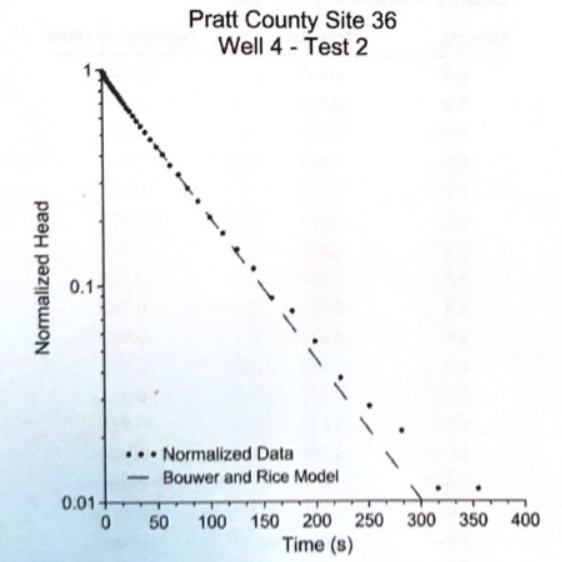

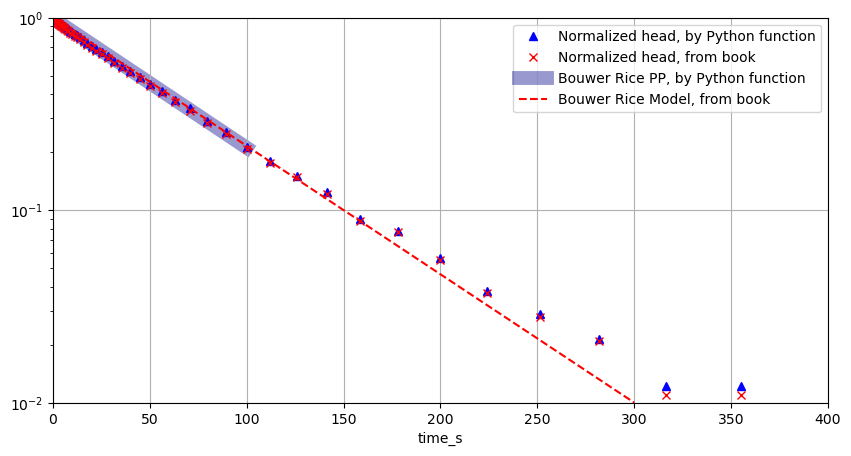

In [49]:
# create figure
fig, ax = plt.subplots(1, figsize=(10, 5))

# plot normalized head by Python, and assign properties of plot
butler.df_ts.head_norm.plot(style='^', color='blue', # markersize=20
                            ax=ax, 
                            label='Normalized head, by Python function',
                            logy=True, xlim=[0, 400], ylim=[0.01, 1],)

# plot normalized head from book
butler.df_ts.normalized_head_from_book.plot(style='x',
                                            ax=ax,
                          label='Normalized head, from book',
                          color='r')

# plot fit by Python
butler.df_fit.h_norm_fit.plot(color='darkblue', lw=10, alpha=0.4, zorder=1,
                              ax=ax, 
                              label='Bouwer Rice PP, by Python function',
                              )

# plot fit from book
df_fit_book = pd.DataFrame([1, 0.01], index=[0, 300], columns=['Bouwer Rice Model, from book'])
df_fit_book.plot(ls='--', color='r', ax=ax,)

ax.legend()
ax.grid()

## Calculate permeability

And compare to results from the book.

In [51]:
butler.KhBouwerRice_PP()

In [53]:
# results from book
lnB_book = 5.5
A_book = 1.86
B_book = 0.281
lnRe_book = 2.01
kr_book = 3.5
kr_book2 = 3.88

print(f'A: {A_book}, {butler.A:0.2f}')
print(f'B: {B_book}, {butler.B:0.2f}')
print(f'K: {kr_book}, {butler.Kh_BR_PP*3600*24:0.2f}')
print(f'T0: 66.3, {butler.T01:0.1f}')

A: 1.86, 1.89
B: 0.281, 0.30
K: 3.5, 3.46
T0: 66.3, 64.0


## Conclusion

The results from Python are nearly the same as in the book. 

It is likely that the results deviate because to book has a slightly other lineralization and fitting.